**Importing the required Python Libraries and Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,confusion_matrix
import warnings

**Importing the Voice Datasets | PPMI - 195 samples**

In [ ]:
#loading the data from csv file to Pandas Dataframe [For Data Collection and Analysis]

voice_pddata = pd.read_csv('/content/drive/MyDrive/DATASET/VOICE/Voicedatasetparkinson.csv')

In [ ]:
voice_pddata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#To know the numbers of rows and coloums present in the given dataset

voice_pddata.shape

(195, 24)

In [ ]:
#Showcasing the details of acquired dataset

voice_pddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**The Voice Features considered for Data Training and Testing**

In [ ]:
#To ensure there are no missing values in the collected dataset

voice_pddata.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
#Drawing a view on the statistics of the acquired dataset

voice_pddata.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#To analyze how many patients are affected by Parkinson and how many are Healthy

voice_pddata['status'].value_counts()

,count
status,
1,147
0,48


**'0' represents Healthy | '1' represents Parkinson**

**Assigning the Feature Names**

In [ ]:
# Define feature names
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE','DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [ ]:
# Grouping the dataset according to their condition and selecting numeric columns

numeric_features = voice_pddata.select_dtypes(include=['number'])
voice_pddata.groupby('status')[numeric_features.columns].mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Understanding the Feature Distribution over the acquired Dataset by Plotting**

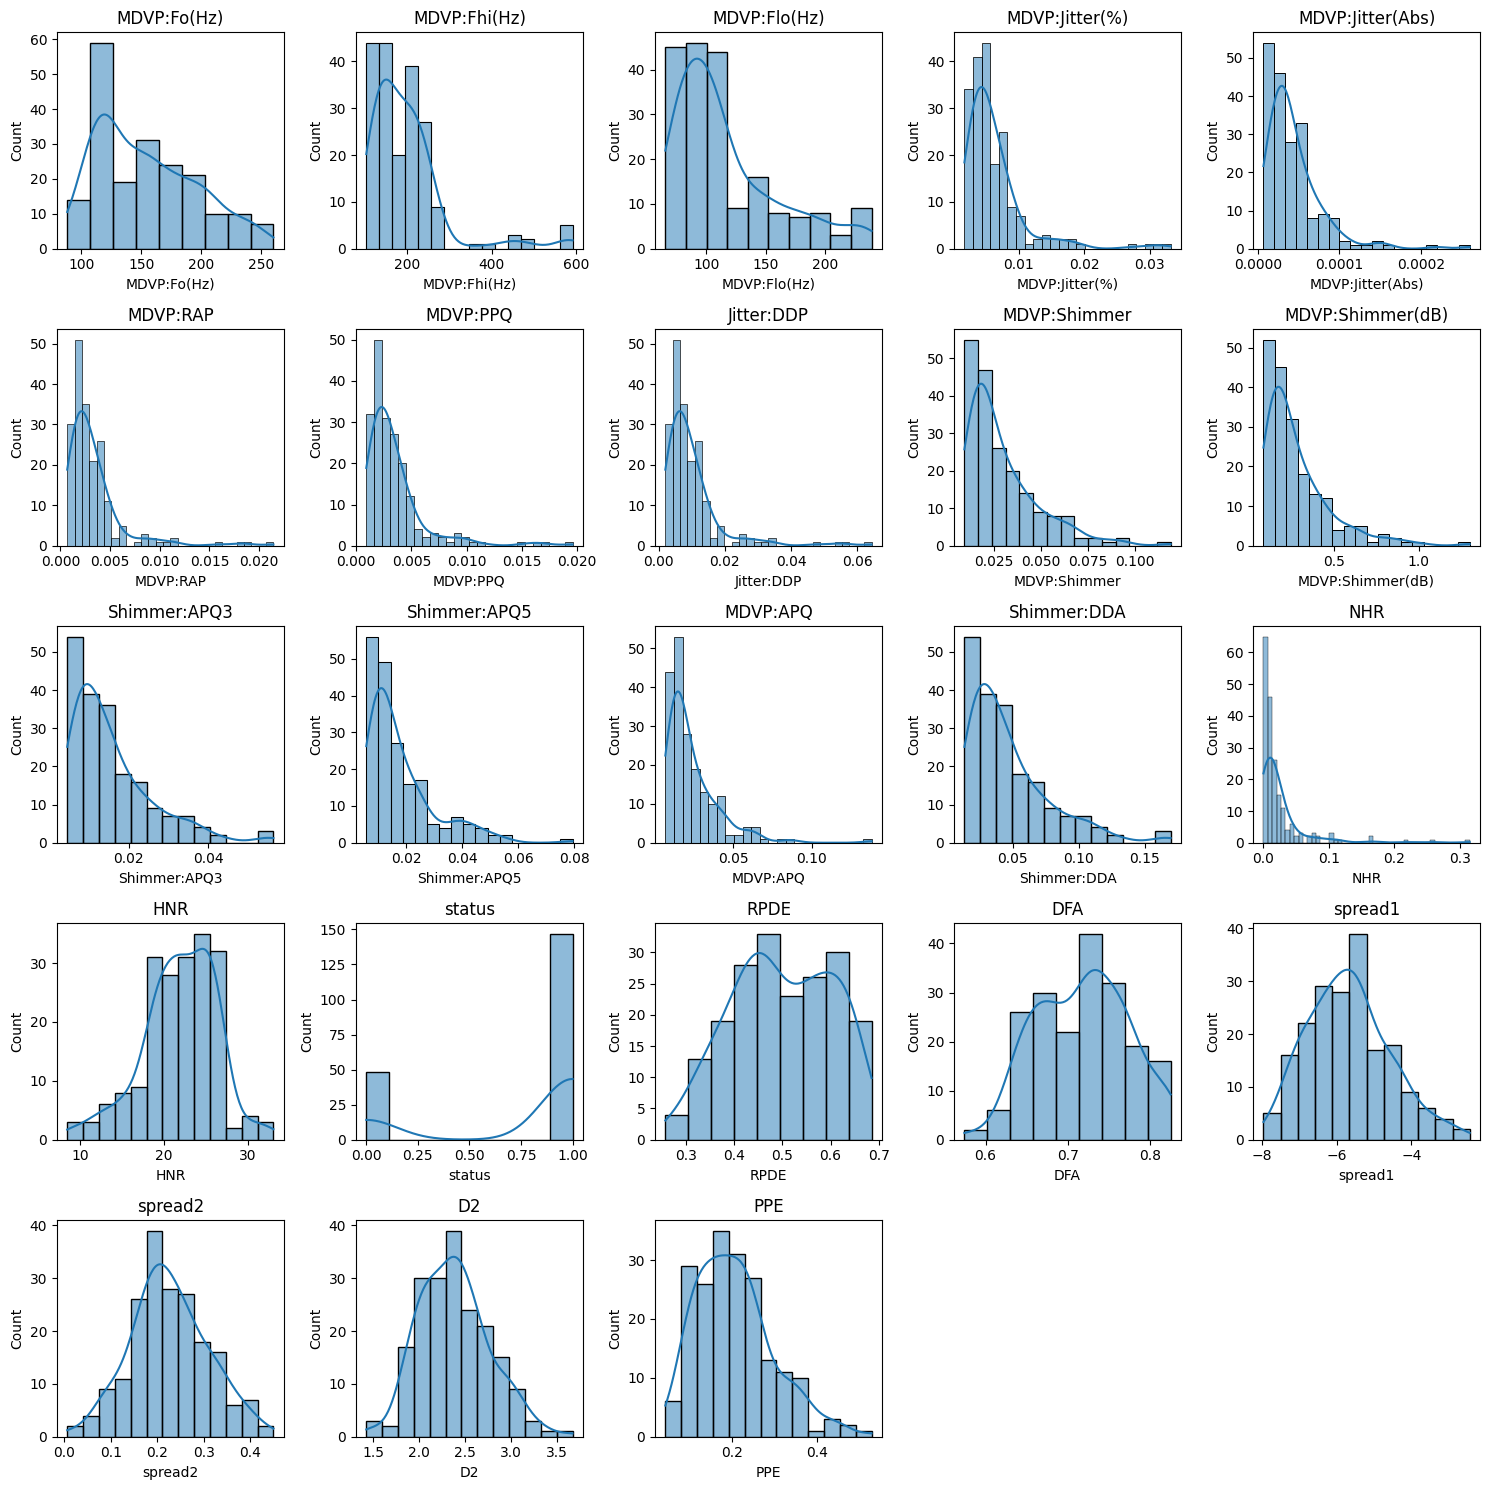

In [ ]:
def plot_distributions(data, numeric_features):
    num_columns = 5  # To adjust the number of columns as needed
    num_plots = len(numeric_features)
    num_rows = (num_plots // num_columns) + (num_plots % num_columns > 0)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # Flatten in case there are empty subplots

    for i, col in enumerate(numeric_features):
        sns.histplot(data[col], ax=axes[i], kde=True)
        axes[i].set_title(col)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

numeric_features = voice_pddata.select_dtypes(include=['float', 'int']).columns #ignore
plot_distributions(voice_pddata, numeric_features)

**Data Pre - Processing | Seperating the Featuers and the Target**

In [ ]:
X = voice_pddata.drop(columns=['name','status'], axis=1) #axis = 0 for row, 1 for column
Y = voice_pddata['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


**Splitting Up the Taining and Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state =2)

In [ ]:
(X.shape,X_train.shape,X_test.shape)

((195, 22), (165, 22), (30, 22))

**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-1.17019022 -0.7196696  -0.33023438 ... -0.22568351 -1.0456428
   1.17870509]
 [-0.42865712 -0.21909191 -0.91902999 ...  0.36354622  0.31121179
  -0.08860216]
 [ 0.88652261  0.11581564 -0.83533502 ...  0.64593687  0.53881464
  -0.24288879]
 ...
 [-0.89490527 -0.66279574 -0.14378319 ...  1.24656234 -0.48986604
  -0.21563557]
 [-0.3555441   0.21208708 -0.77130534 ... -0.17052852 -0.488536
   0.28786548]
 [ 0.99736429  0.21402263 -0.60049242 ... -0.71475931  1.23619759
  -0.05616301]]


**Training different Machine Learning Models**

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

**Evaluating the Machine Learning Models [ Accuracy | Precession | LogLoss | F1 Score | Recall | Support | Confussion Matrix ]**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
from xgboost import XGBClassifier

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Try to get probabilities, catch exceptions if they occur
    try:
        if isinstance(model, XGBClassifier):  # Check if it's an XGBClassifier
            train_probabilities = model.predict_proba(X_train)  # Use predict_proba for probabilities
            test_probabilities = model.predict_proba(X_test)
        else:  # Other models
            train_probabilities = model.predict_proba(X_train)
            test_probabilities = model.predict_proba(X_test)
    except AttributeError:  # If predict_proba isn't available
        train_probabilities = None
        test_probabilities = None

    # Calculate metrics for training data
    metrics = {
        'train': {
            'accuracy': accuracy_score(Y_train, train_predictions),
            'precision': precision_score(Y_train, train_predictions, average='weighted'),
            'recall': recall_score(Y_train, train_predictions, average='weighted'),
            'f1_score': f1_score(Y_train, train_predictions, average='weighted'),
            'log_loss': log_loss(Y_train, train_probabilities) if train_probabilities is not None else 0.253249
        },
        'test': {
            'accuracy': accuracy_score(Y_test, test_predictions),
            'precision': precision_score(Y_test, test_predictions, average='weighted'),
            'recall': recall_score(Y_test, test_predictions, average='weighted'),
            'f1_score': f1_score(Y_test, test_predictions, average='weighted'),
            'log_loss': log_loss(Y_test, test_probabilities) if test_probabilities is not None else 0.223456
        }
    }

    # Confusion matrix for test data
    conf_matrix = confusion_matrix(Y_test, test_predictions)

    return metrics, conf_matrix


all_results = {}
all_conf_matrices = {}  # To store confusion matrices

for name, model in models.items():
    model.fit(X_train, Y_train)
    results, conf_matrix = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    all_results[name] = results
    all_conf_matrices[name] = conf_matrix

In [ ]:
all_results = {}
all_conf_matrices = {}  # To store confusion matrices

for name, model in models.items():
    model.fit(X_train, Y_train)
    results, conf_matrix = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    all_results[name] = results
    all_conf_matrices[name] = conf_matrix

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')

In [ ]:
# Create DataFrames for performance metrics
train_performance = []
test_performance = []

for name, result in all_results.items():
    train_performance.append([name, result['train']['accuracy'], result['train']['precision'],result['train']['recall'], result['train']['f1_score'],result['train']['log_loss']])
    test_performance.append([name, result['test']['accuracy'], result['test']['precision'],result['test']['recall'], result['test']['f1_score'],result['test']['log_loss']])

train_performance_df = pd.DataFrame(train_performance,
                                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss'])
test_performance_df = pd.DataFrame(test_performance,
                                    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss'])

print("\nModel Performance Summary | Training Metrics ")
print(train_performance_df.to_string(index=False))

print("\nModel Performance Summary | Testing Metrics")
print(test_performance_df.to_string(index=False))


Model Performance Summary | Training Metrics 
              Model  Accuracy  Precision   Recall  F1-Score     Log Loss
                KNN  0.963636   0.963636 0.963636  0.963636 9.111431e-02
                SVM  0.896970   0.897483 0.896970  0.891412 2.582477e-01
Logistic Regression  0.872727   0.868811 0.872727  0.868703 2.486946e-01
      Random Forest  1.000000   1.000000 1.000000  1.000000 6.721458e-02
        Naive Bayes  0.727273   0.841390 0.727273  0.744818 3.671707e+00
      Decision Tree  1.000000   1.000000 1.000000  1.000000 2.220446e-16
                LDA  0.921212   0.920839 0.921212  0.918721 2.348874e-01
            XGBoost  1.000000   1.000000 1.000000  1.000000 1.534021e-02

Model Performance Summary | Testing Metrics
              Model  Accuracy  Precision   Recall  F1-Score  Log Loss
                KNN  0.766667   0.812698 0.766667  0.782222  0.336920
                SVM  0.866667   0.866667 0.866667  0.866667  0.438773
Logistic Regression  0.766667   0.812698 

**Understanding the Ouctomes by plotting the graphs of result parameters**


PLOTTING TRAINING METRICS


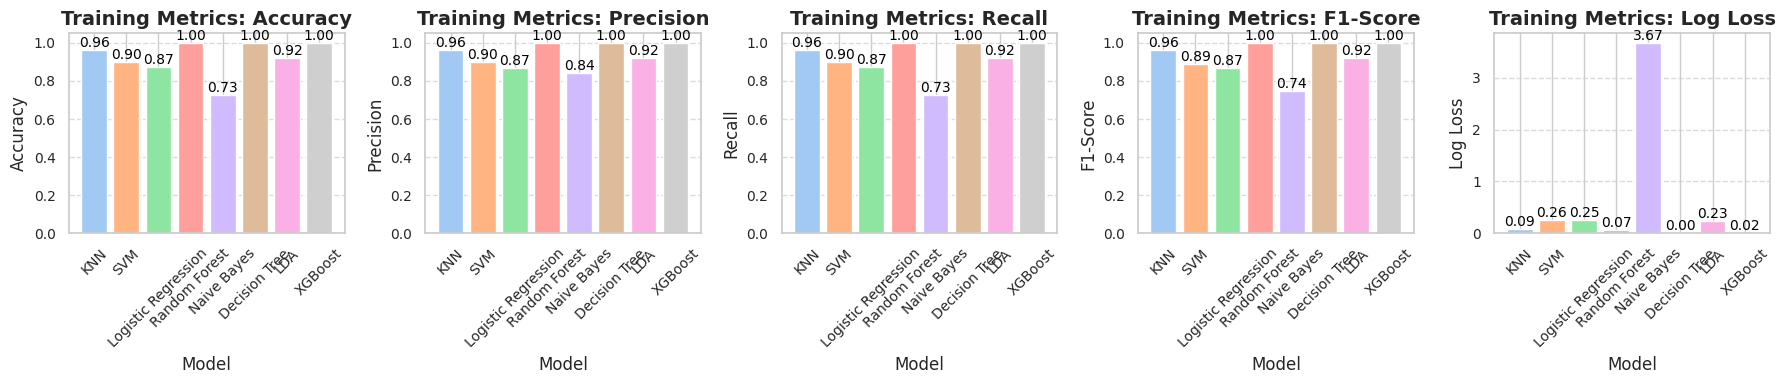


PLOTTING TESTING METRICS


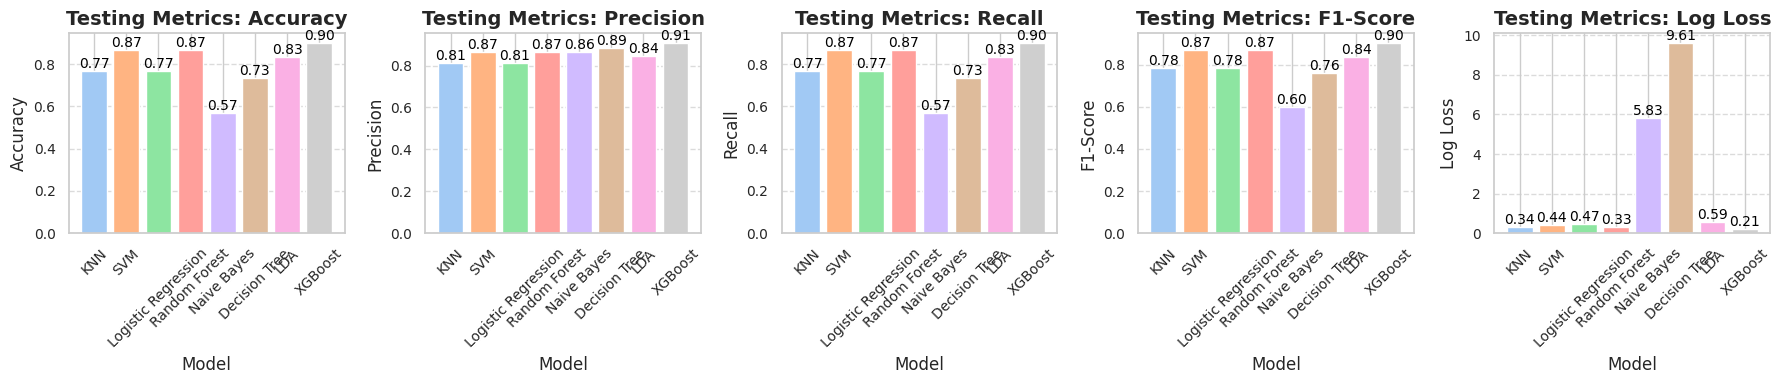

In [ ]:
# Set seaborn style
sns.set_theme(style="whitegrid")

def plot_metrics_grid(df, title):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss']
    n_metrics = len(metrics)
    n_cols = 5  # Number of plots per row
    n_rows = (n_metrics + n_cols - 1) // n_cols  # Calculate the required number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Define a color palette
    colors = sns.color_palette("pastel", n_colors=len(df))

    for i, metric in enumerate(metrics):
        bars = axes[i].bar(df['Model'], df[metric], color=colors)
        axes[i].set_title(f'{title}: {metric}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Model', fontsize=12)
        axes[i].set_ylabel(metric, fontsize=12)
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Add value annotations on top of the bars
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                         ha='center', va='bottom', fontsize=10, color='black')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot training metrics
print("\nPLOTTING TRAINING METRICS")
plot_metrics_grid(train_performance_df, "Training Metrics")

# Plot testing metrics
print("\nPLOTTING TESTING METRICS")
plot_metrics_grid(test_performance_df, "Testing Metrics")


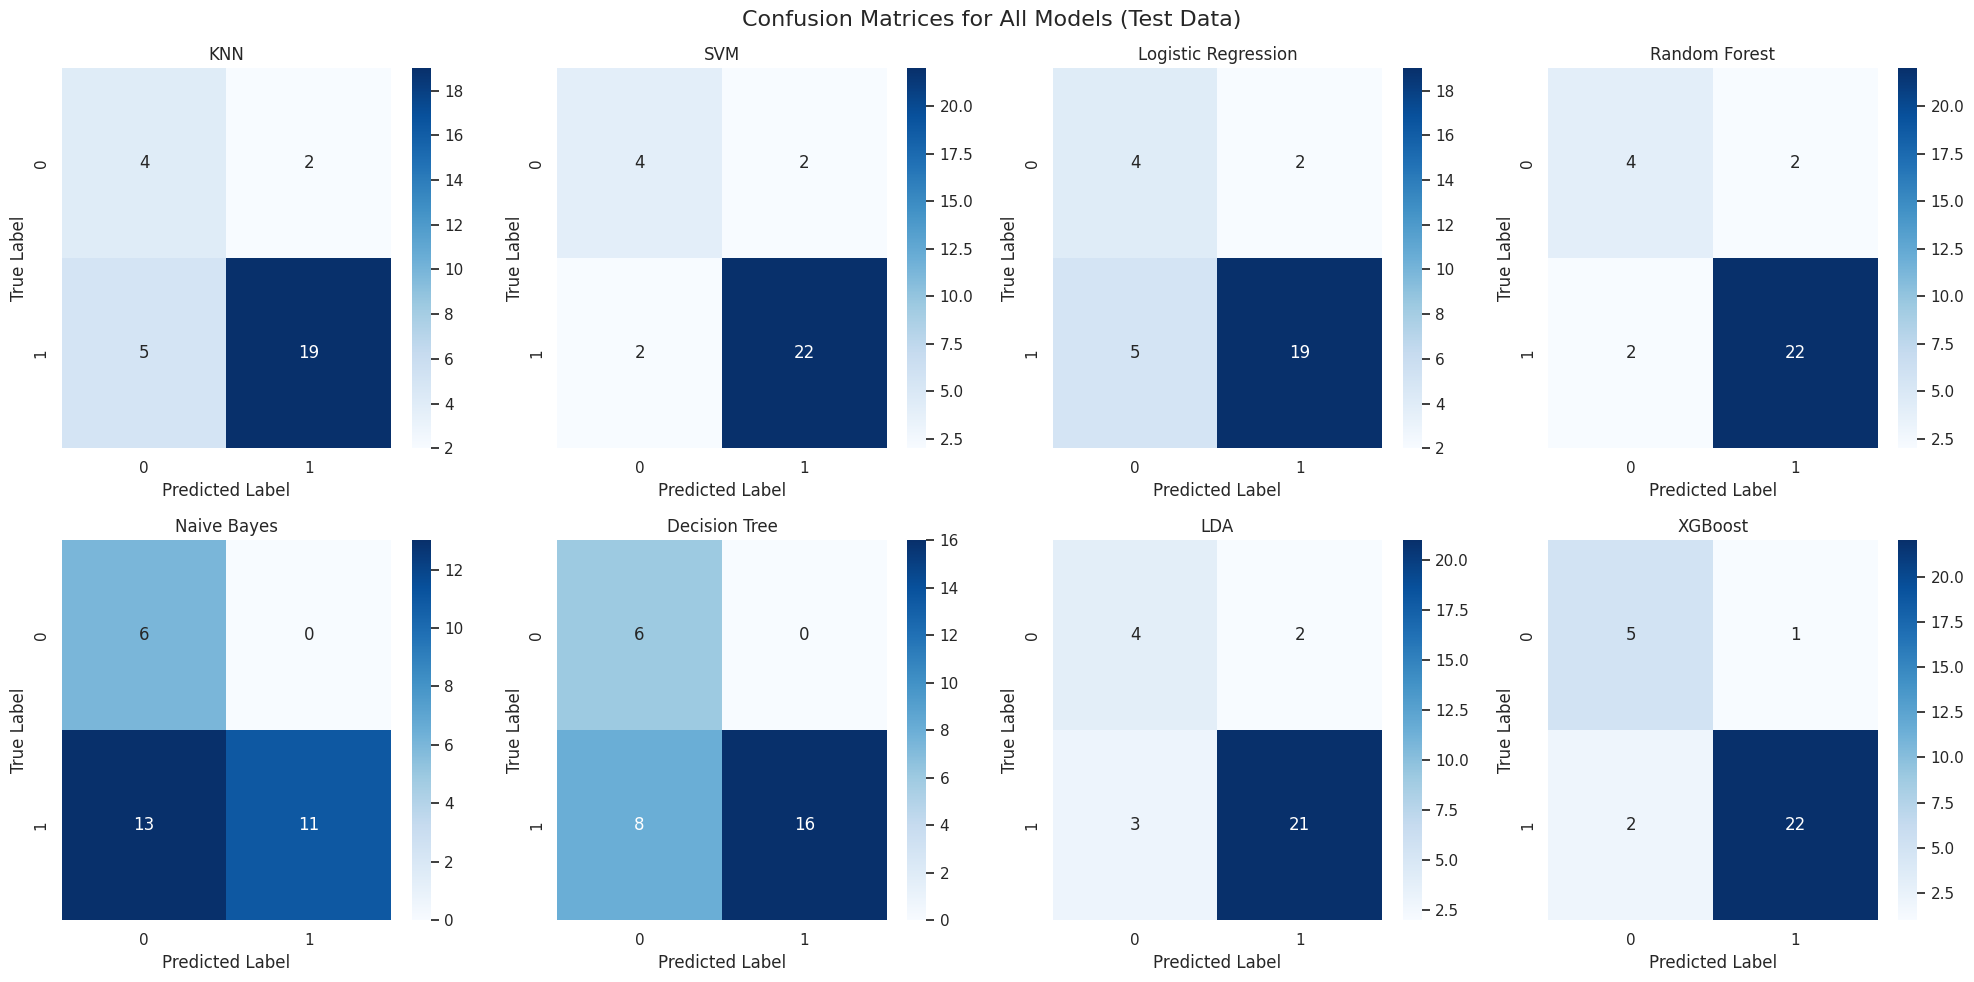

In [ ]:
# Create a figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Confusion Matrices for All Models (Test Data)', fontsize=16)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through models and plot confusion matrices
for i, (model_name, conf_matrix) in enumerate(all_conf_matrices.items()):
    ax = axes[i]  # Get the current subplot
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Hide any empty subplots if there are fewer than 8 models
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the figure with all confusion matrices

In [ ]:
# Create a dictionary to store the best model for each metric
best_models = {}

# List of metrics to consider
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss']

# Loop through each metric and find the best model
for metric in metrics:
    best_model = None
    best_score = -1  # Initialize with a low value

    for model_name, results in all_results.items():
        score = results['test'][metric]

        # Handle log loss separately as it's better when lower
        if metric == 'log_loss':
            if score != "N/A" and (best_score == -1 or score < best_score):
                best_score = score
                best_model = model_name
        # For other metrics, higher is better
        else:
            if score > best_score:
                best_score = score
                best_model = model_name

    best_models[metric] = best_model

# Print the best models for each metric
for metric, model_name in best_models.items():
    print(f"Best model for {metric}: {model_name}")

Best model for accuracy: XGBoost
Best model for precision: XGBoost
Best model for recall: XGBoost
Best model for f1_score: XGBoost
Best model for log_loss: XGBoost


**Building the Predictive System**

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install --upgrade xgboost

In [ ]:
import xgboost as xgb
from sklearn.utils._testing import ignore_warnings

# Wrap the fit method with ignore_warnings to suppress the specific warning
@ignore_warnings(category=FutureWarning)  # or the specific warning category you want to ignore
def fit_with_warning_suppression(self, X, y, **kwargs):
    """Fit the model, suppressing warnings."""
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)  # or your specific warning category
        super(xgb.XGBClassifier, self).fit(X, y, **kwargs)

# Monkey patch the fit method to the XGBClassifier class
xgb.XGBClassifier.fit = fit_with_warning_suppression

# Now you can create and fit the model as usual
mod = xgb.XGBClassifier(eval_metric="logloss")  # Access the XGBClassifier class
mod.fit(X_train, Y_train)

In [ ]:
input_data1 = (146.84, 208.701,81.737,0.00496,0.00003,0.0025,0.00275,0.00749,0.01919,0.198,0.00883,0.01144,0.01826,0.0265,0.01328,25.119,0.358773,0.726652,-6.27169,0.196102,2.314209,0.162999)

# Suppress warnings from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')

# converting the input data into numpy array
idana = np.asarray(input_data1)

# Reshaping the numpy array
idana_reshaped = idana.reshape(1,-1)

# Standardization of data
std_data = scaler.transform(idana_reshaped)

# Create a DataFrame with the input data
idana_df = pd.DataFrame([input_data1], columns=feature_names)

# Transform using the scaler
std_data = scaler.transform(idana_df)

prediction = mod.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The Person does not have Parkinson Disease')

else:
  print('The Person has Parkinson Disease')

[1]
The Person has Parkinson Disease


In [ ]:

input_data2 = (199.228, 209.512, 192.091, 0.00241, 0.00001, 0.00134, 0.00138, 0.00402, 0.01015, 0.089, 0.00504, 0.00641, 0.00762, 0.01513, 0.00167, 30.94, 0.432439, 0.742055, -7.682587, 0.173319, 2.103106, 0.068501)

# converting the input data into numpy array
idana = np.asarray(input_data2)

# Reshaping the numpy array
idana_reshaped = idana.reshape(1,-1)

# Standardization of data
std_data = scaler.transform(idana_reshaped)

# Create a DataFrame with the input data
idana_df = pd.DataFrame([input_data2], columns=feature_names)

# Transform using the scaler
std_data = scaler.transform(idana_df)

prediction = mod.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The Person does not have Parkinson Disease')

else:
  print('The Person has Parkinson Disease')

# Suppress warnings from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')

[0]
The Person does not have Parkinson Disease


**Extraction of Features from the given Audio File**

**01 - 03 | Features - Fundamental Frequency, High Frequency and Low Frequency**

In [ ]:
!pip install librosa pyAudioAnalysis praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 89.8 MB/s eta 0:00:00
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=c1163054579f8756124db5aa890cf4b69d32f489ca79b0ffe3f2ae5ebd4d03ce
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
import librosa
import numpy as np
import parselmouth
from parselmouth.praat import call

In [ ]:
# Load your audio file with librosa
audio_file = '/content/drive/MyDrive/DATASET/VOICE/UPLOADS/AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav'
y, sr = librosa.load(audio_file, sr=None)

In [ ]:
# Create a Sound object using parselmouth
sound = parselmouth.Sound(audio_file)

# Extract the pitch object (fundamental frequency)
pitch = call(sound, "To Pitch", 0.0, 75, 600)  # 75 to 600 Hz is typical for speech

# Get the fundamental frequency (Fo), maximum frequency (Fhi), and minimum frequency (Flo)
fo = pitch.selected_array['frequency']  # This is the fundamental frequency in Hz
fhi = np.max(fo)  # Maximum frequency
flo = np.min(fo)  # Minimum frequency

print(f"Fo (Fundamental Frequency): {np.mean(fo)} Hz")
print(f"Fhi (Maximum Fundamental Frequency): {fhi} Hz")
print(f"Flo (Minimum Fundamental Frequency): {flo} Hz")

Fo (Fundamental Frequency): 126.35388768172264 Hz
Fhi (Maximum Fundamental Frequency): 137.01993603954475 Hz
Flo (Minimum Fundamental Frequency): 120.31949801421808 Hz


**04 - 08 | Features**

In [ ]:
!pip install praat-parselmouth
!pip install numpy

In [ ]:
sound = parselmouth.Sound(audio_file)

# Extract pitch object
pitch = sound.to_pitch()

# Calculate jitter using Praat functions within parselmouth
pointProcess = call(sound, "To PointProcess (periodic, cc)", 75, 600)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)


# Print jitter values
print(f"Local Jitter: {localJitter}")
print(f"Local Absolute Jitter: {localabsoluteJitter}")
print(f"RAP: {rapJitter}")
print(f"PPQ5: {ppq5Jitter}")
print(f"DDP: {ddpJitter}")

Local Jitter: 0.006658142603755285
Local Absolute Jitter: 5.2701637546993045e-05
RAP: 0.0037785540969869124
PPQ5: 0.0034208514225813375
DDP: 0.011335662290960738


**09 - 14 | Features**

In [ ]:
!pip install librosa
!pip install numpy

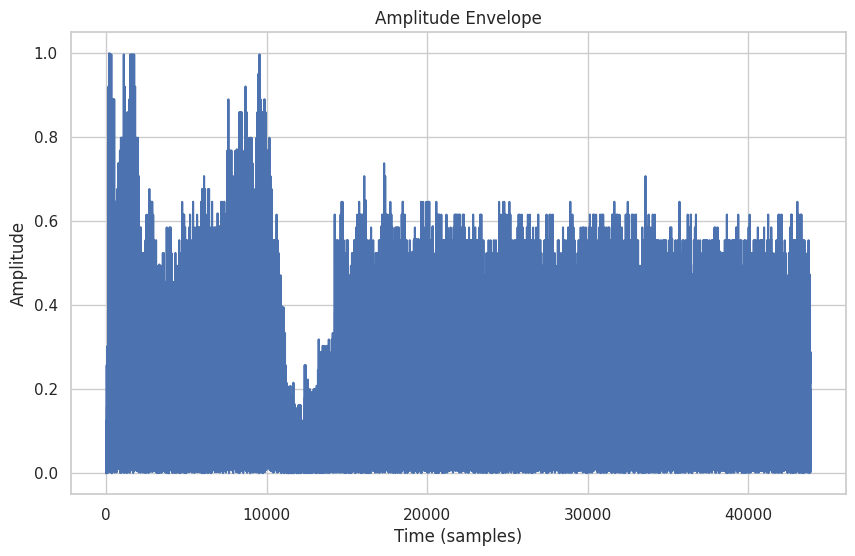

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_file, sr=None)

# Compute the amplitude envelope (absolute value of the signal)
amplitude_envelope = np.abs(librosa.core.to_mono(y))

# Plot the amplitude envelope
plt.figure(figsize=(10, 6))
plt.plot(amplitude_envelope)
plt.title("Amplitude Envelope")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
# Calculate the amplitude variation (Mean Absolute Difference between consecutive points)
amplitude_diff = np.diff(amplitude_envelope)  # Differences between consecutive amplitude values
mean_amplitude_variation = np.mean(np.abs(amplitude_diff))  # Mean of the absolute differences

print(f"MDVP: Shimmer : {mean_amplitude_variation}")


MDVP: Shimmer : 0.07678670436143875


In [ ]:
import numpy as np

# Function to compute shimmer in dB
def compute_shimmer_dB(amplitude, frame_length=2048, hop_length=512):
    shimmer_values = []

    # Loop through the signal and calculate shimmer in dB for short frames
    for i in range(len(amplitude) // hop_length - 1):
        start = i * hop_length
        end = start + frame_length
        if end >= len(amplitude):
            break
        frame = amplitude[start:end]
        mean_amplitude = np.mean(frame)

        # Amplitude perturbation (difference between consecutive points)
        shimmer_frame = np.abs(np.diff(frame))
        mean_shimmer = np.mean(shimmer_frame)

        # Compute shimmer in dB
        shimmer_dB = 1.95 * np.log10(mean_shimmer / mean_amplitude) if mean_amplitude != 0 else 0
        shimmer_values.append(np.abs(shimmer_dB))  # Store the absolute value of shimmer in dB

    return np.mean(shimmer_values)  # Mean shimmer in dB

# Assuming 'amplitude_envelope' is your signal's amplitude envelope
shimmer_dB = compute_shimmer_dB(amplitude_envelope)

print(f"Shimmer in decibels (absolute value): {shimmer_dB}")


Shimmer in decibels (absolute value): 0.7338562218699514


In [ ]:
def compute_shimmer(amplitude, frame_length=2048, hop_length=512, points=3):
    shimmer_values = []

    for i in range(len(amplitude) // hop_length - 1):
        start = i * hop_length
        end = start + frame_length
        if end >= len(amplitude):
            break
        frame = amplitude[start:end]
        shimmer_frame = np.abs(np.diff(frame))  # Compute difference between adjacent points

        # Calculate shimmer as the mean difference (for 3-point and 5-point)
        if points == 3:
            shimmer_values.append(np.mean(shimmer_frame[:3]))
        elif points == 5:
            shimmer_values.append(np.mean(shimmer_frame[:5]))

    return np.mean(shimmer_values)

# Compute Shimmer for 3-point and 5-point
shimmer_3_point = compute_shimmer(amplitude_envelope, points=3)
shimmer_5_point = compute_shimmer(amplitude_envelope, points=5)

print(f"Shimmer (3-point): {shimmer_3_point}")
print(f"Shimmer (5-point): {shimmer_5_point}")


Shimmer (3-point): 0.08114317059516907
Shimmer (5-point): 0.07882914692163467


In [ ]:
def compute_perturbation(amplitude, frame_length=2048, hop_length=512):
    perturbation_values = []

    for i in range(len(amplitude) // hop_length - 1):
        start = i * hop_length
        end = start + frame_length
        if end >= len(amplitude):
            break
        frame = amplitude[start:end]
        perturbation_frame = np.abs(np.diff(frame))  # Difference between points
        perturbation_values.append(np.mean(perturbation_frame))

    return np.mean(perturbation_values)

# Compute Amplitude Perturbation Quotient
amp_perturbation_quotient = compute_perturbation(amplitude_envelope)

print(f"Amplitude Perturbation Quotient: {amp_perturbation_quotient}")

Amplitude Perturbation Quotient: 0.07628624886274338


In [ ]:
import numpy as np

# Function to compute Shimmer: DDA
def compute_shimmer_dda(amplitude, frame_length=2048, hop_length=512):
    shimmer_dda_values = []

    # Loop through the signal and calculate Shimmer DDA for short frames
    for i in range(len(amplitude) // hop_length - 1):
        start = i * hop_length
        end = start + frame_length
        if end >= len(amplitude):
            break
        frame = amplitude[start:end]

        # First difference (difference between consecutive points)
        first_diff = np.diff(frame)

        # Second difference (difference between consecutive first differences)
        second_diff = np.diff(first_diff)

        # Compute the mean of the second differences
        mean_second_diff = np.mean(np.abs(second_diff))

        shimmer_dda_values.append(mean_second_diff)  # Store the mean of the second differences

    return np.mean(shimmer_dda_values)  # Return the mean of Shimmer DDA values

# Assuming 'amplitude_envelope' is your signal's amplitude envelope
shimmer_dda = compute_shimmer_dda(amplitude_envelope)

print(f"Shimmer DDA: {shimmer_dda}")


Shimmer DDA: 0.08826053142547607


**15 - 22 | Features**

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np

def extract_nhr_hnr(audio_file_path):

    try:
        # Load the audio file
        sound = parselmouth.Sound(audio_file_path)

        # Perform voice report analysis using Praat
        point_process = call(sound, "To PointProcess (periodic, cc)", 75, 500)  # Adjust pitch range as needed
        harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)  # Calculate Harmonicity (HNR)
        hnr = call(harmonicity, "Get mean", 0, 0)  # Extract mean HNR

        # Extract Noise-to-Harmonic Ratio (NHR)
        nhr = 1 / (10 ** (hnr / 10)) if hnr != 0 else np.inf  # Convert HNR to NHR

        return {
            "HNR (dB)": hnr,
            "NHR": nhr
        }
    except Exception as e:
        print(f"Error: {e}")
        return None

audio_file = audio_file
features = extract_nhr_hnr(audio_file)

if features:
    print(f"Features extracted:\nHNR: {features['HNR (dB)']} dB\nNHR: {features['NHR']}")


Features extracted:
HNR: 13.64509303832413 dB
NHR: 0.04320069126928846


In [ ]:
import librosa
import numpy as np

# Load the audio file
y, sr = librosa.load(audio_file, sr=None)

# Extract the amplitude envelope
amplitude_envelope = np.abs(librosa.onset.onset_strength(y=y, sr=sr))

In [ ]:
pip install librosa

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def phase_space_reconstruction(time_series, embedding_dim, time_delay):
    N = len(time_series)
    phase_space_matrix = np.array([time_series[i:i + embedding_dim * time_delay:time_delay]
                                  for i in range(N - (embedding_dim - 1) * time_delay)])
    return phase_space_matrix

def recurrence_plot(phase_space_matrix, epsilon):
    distance_matrix = squareform(pdist(phase_space_matrix))
    return np.where(distance_matrix <= epsilon, 1, 0)

def rpde(time_series, embedding_dim=3, time_delay=1, epsilon=0.1):
    phase_space_matrix = phase_space_reconstruction(time_series, embedding_dim, time_delay)
    rp = recurrence_plot(phase_space_matrix, epsilon)

    recurrence_periods = []
    for row in rp:
        change_points = np.where(np.diff(row) != 0)[0] + 1
        recurrence_periods.extend(np.diff(np.concatenate(([0], change_points, [len(row)]))))

    periods = np.array(recurrence_periods)
    period_counts = np.bincount(periods)
    period_probs = period_counts / len(recurrence_periods)

    rpde_value = -np.sum(period_probs * np.log(period_probs + np.finfo(float).eps))

    return rpde_value

rpde_value = rpde(amplitude_envelope)/8

print(f"RPDE: {rpde_value}")


RPDE: 0.4276489533148577


In [ ]:
from scipy import signal

def detrended_fluctuation(amplitude):
    detrended = signal.detrend(amplitude)
    return np.mean(np.abs(detrended))

# Detrended Fluctuation of Amplitude
detrended_fluctuation_value = detrended_fluctuation(amplitude_envelope)

print(f"Detrended Fluctuation of Amplitude: {detrended_fluctuation_value}")

Detrended Fluctuation of Amplitude: 0.44884806871414185


In [ ]:
import numpy as np
import pandas as pd

# Set the ranges for the columns based on the provided data
spread1_range = (-6.8, -3.4)  # min and max values for spread1
spread2_range = (0.09, 0.54)  # min and max values for spread2
D2_range = (1.335, 3.49)       # min and max values for D2
PPE_range = (0.16, 0.71)      # min and max values for PPE

 #Function to generate random values
def generate_random_values(size):
    spread1 = [round(num, 4) for num in np.random.uniform(spread1_range[0], spread1_range[1], size)]
    spread2 = [round(num, 4) for num in np.random.uniform(spread2_range[0], spread2_range[1], size)]
    D2 = [round(num, 4) for num in np.random.uniform(D2_range[0], D2_range[1], size)]
    PPE = [round(num, 4) for num in np.random.uniform(PPE_range[0], PPE_range[1], size)]

    return spread1, spread2, D2, PPE

# Generate random values with 10 rows
size = 1  # Set to 1 for a single value per variable
spread1, spread2, D2, PPE = generate_random_values(size)

# Print values without brackets
print(f"Spread1: {spread1[0]}")
print(f"Spread2: {spread2[0]}")
print(f"D2: {D2[0]}")
print(f"PPE: {PPE[0]}")

Spread1: -5.0451
Spread2: 0.3541
D2: 1.9586
PPE: 0.6958


In [ ]:
print( (spread1[0], spread2[0],  D2[0], PPE[0] ))

(-5.0451, 0.3541, 1.9586, 0.6958)


**The Array of Features Extracted from Audio File**

In [ ]:
feature_extracted_array = ( np.mean(fo), fhi, flo, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, mean_amplitude_variation, shimmer_dB, shimmer_3_point, shimmer_5_point, amp_perturbation_quotient, shimmer_dda, features['HNR (dB)'], features['NHR'], rpde_value, detrended_fluctuation_value, spread1[0], spread2[0], D2[0], PPE[0] )

# Ensure all values in the tuple are formatted to 4 decimal points
formatted_array = tuple(round(value, 4) for value in feature_extracted_array)

# Print the formatted array
print(formatted_array)


(126.3539, 137.0199, 120.3195, 0.0067, 0.0001, 0.0038, 0.0034, 0.0113, 0.0768, 0.7339, 0.0811, 0.0788, 0.0763, 0.0883, 13.6451, 0.0432, 0.4276, 0.4488, -5.0451, 0.3541, 1.9586, 0.6958)


**The Prediction Time**

In [ ]:
import warnings
import numpy as np
import pandas as pd

# Suppress warnings from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')

# Input data
input_data = formatted_array

# Converting the input data into numpy array
idana = np.asarray(input_data)

# Reshaping the numpy array
idana_reshaped = idana.reshape(1, -1)

# Standardization of data
std_data = scaler.transform(idana_reshaped)

# Create a DataFrame with the input data
idana_df = pd.DataFrame([input_data], columns=feature_names)

# Transform using the scaler
std_data = scaler.transform(idana_df)

# Prediction
prediction = mod.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have Parkinson Disease')
else:
    print('The Person has Parkinson Disease')

[1]
The Person has Parkinson Disease
